In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [4]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,1,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,1,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,1,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,0,35.0,0,0,8.0500,NaN,S,Mr


In [5]:
guess_ages = np.zeros((2,3))
guess_ages
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()
#             guess_df.head()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            print(guess_ages)
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

dataset['Age'] = dataset['Age'].astype(int)


[[40.  0.  0.]
 [ 0.  0.  0.]]
[[40. 30.  0.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [35.  0.  0.]]
[[40. 30. 25.]
 [35. 28.  0.]]
[[40.  30.  25. ]
 [35.  28.  21.5]]
[[42.  30.  25. ]
 [35.  28.  21.5]]
[[42.  28.  25. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [41.  28.  21.5]]
[[42.  28.  24. ]
 [41.  24.  21.5]]
[[42. 28. 24.]
 [41. 24. 22.]]


In [6]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)



C:\Users\DENIMA REDDY\AppData\Local\Temp\ipykernel_20268\1577546416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [7]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,NaN,S,Mr,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C85,C,Mrs,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,NaN,S,Miss,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,C123,S,Mrs,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,NaN,S,Mr,"(32.252, 48.168]"


In [8]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [9]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [10]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,NaN,S,Mr,0
1,1,1,1,2.0,71.2833,C85,C,Mrs,0
2,1,3,1,1.0,7.9250,NaN,S,Miss,1
3,1,1,1,2.0,53.1000,C123,S,Mrs,0
4,0,3,0,2.0,8.0500,NaN,S,Mr,1


In [11]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [12]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [13]:
def encode_embarked(value):
    l = [1 if value == 'C' else 0]  
    l += [1 if value == 'Q' else 0]
    l += [1 if value == 'S' else 0]
    return l

def encode_title(value):
    m = [1 if value == "Mr" else 0]
    m += [1 if value == "Miss" else 0]
    m += [1 if value == "Mrs" else 0]
    m += [1 if value == "Master" else 0]
    m += [1 if value == "Rare" else 0]
    return m

# Encode the embarked and Titles column
train_df[['Title_Mr', 'Title_Miss', 'Title_Mrs', 'Title_Master', 'Title_Rare']] = train_df['Title'].apply(lambda x: pd.Series(encode_title(x)))
train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_df['Embarked'].apply(lambda x: pd.Series(encode_embarked(x)))

test_df[['Title_Mr', 'Title_Miss', 'Title_Mrs', 'Title_Master', 'Title_Rare']] = test_df['Title'].apply(lambda x: pd.Series(encode_title(x)))
test_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = test_df['Embarked'].apply(lambda x: pd.Series(encode_embarked(x)))

# dropping the original columns
train_df = train_df.drop(['Embarked', 'Title'], axis=1)
test_df = test_df.drop(['Embarked', 'Title'], axis=1)

# printing to verify
print(train_df.head())
print(test_df.head())

   Survived  Pclass  Sex  Age     Fare Cabin  IsAlone  Age*Class  Title_Mr  \
0         0       3    0  1.0   7.2500   NaN        0        3.0         1   
1         1       1    1  2.0  71.2833   C85        0        2.0         0   
2         1       3    1  1.0   7.9250   NaN        1        3.0         0   
3         1       1    1  2.0  53.1000  C123        0        2.0         0   
4         0       3    0  2.0   8.0500   NaN        1        6.0         1   

   Title_Miss  Title_Mrs  Title_Master  Title_Rare  Embarked_C  Embarked_Q  \
0           0          0             0           0           0           0   
1           0          1             0           0           1           0   
2           1          0             0           0           0           0   
3           0          1             0           0           0           0   
4           0          0             0           0           0           0   

   Embarked_S  
0           1  
1           0  
2           1 

In [14]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
for dataset in combine:
    dataset['Fare'].fillna(0, inplace=True) 
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

C:\Users\DENIMA REDDY\AppData\Local\Temp\ipykernel_20268\2606859201.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,Survived,Pclass,Sex,Age,Fare,Cabin,IsAlone,Age*Class,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,1.0,7.2500,NaN,0,3.0,1,0,0,0,0,0,0,1
1,1,1,1,2.0,71.2833,C85,0,2.0,0,0,1,0,0,1,0,0
2,1,3,1,1.0,7.9250,NaN,1,3.0,0,1,0,0,0,0,0,1
3,1,1,1,2.0,53.1000,C123,0,2.0,0,0,1,0,0,0,0,1
4,0,3,0,2.0,8.0500,NaN,1,6.0,1,0,0,0,0,0,0,1
5,0,3,0,1.0,8.4583,NaN,1,3.0,1,0,0,0,0,0,1,0
6,0,1,0,3.0,51.8625,E46,1,3.0,1,0,0,0,0,0,0,1
7,0,3,0,0.0,21.0750,NaN,0,0.0,0,0,0,1,0,0,0,1
8,1,3,1,1.0,11.1333,NaN,0,3.0,0,0,1,0,0,0,0,1
9,1,2,1,0.0,30.0708,NaN,0,0.0,0,0,1,0,0,1,0,0


In [15]:
# ... (same as your current script until feature engineering part)
deck_mapping = {"U": 9,"T": 8,"G": 7,"F": 6,"E": 5,"D": 4,"C": 3,"B": 2,"A": 1 } # U  for unknown Deck 


# Adding Cabin Deck as a feature
for dataset in combine:
    dataset['Deck'] = dataset.Cabin.str.extract('([A-Za-z]+)', expand=False)
    dataset['Deck'] = dataset['Deck'].map(deck_mapping) # Map the Deck names to numerical values
    dataset['Deck'] = dataset['Deck'].fillna(0)

# Recursive Feature Elimination for Feature selection 
dataset['Deck']=dataset['Deck'].astype(int)

train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)
train_df['Deck']=train_df['Deck'].astype(int)
test_df['Deck']=test_df['Deck'].astype(int)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,Deck
0,0,3,0,1.0,7.2500,0,3.0,1,0,0,0,0,0,0,1,0
1,1,1,1,2.0,71.2833,0,2.0,0,0,1,0,0,1,0,0,3
2,1,3,1,1.0,7.9250,1,3.0,0,1,0,0,0,0,0,1,0
3,1,1,1,2.0,53.1000,0,2.0,0,0,1,0,0,0,0,1,3
4,0,3,0,2.0,8.0500,1,6.0,1,0,0,0,0,0,0,1,0


In [16]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

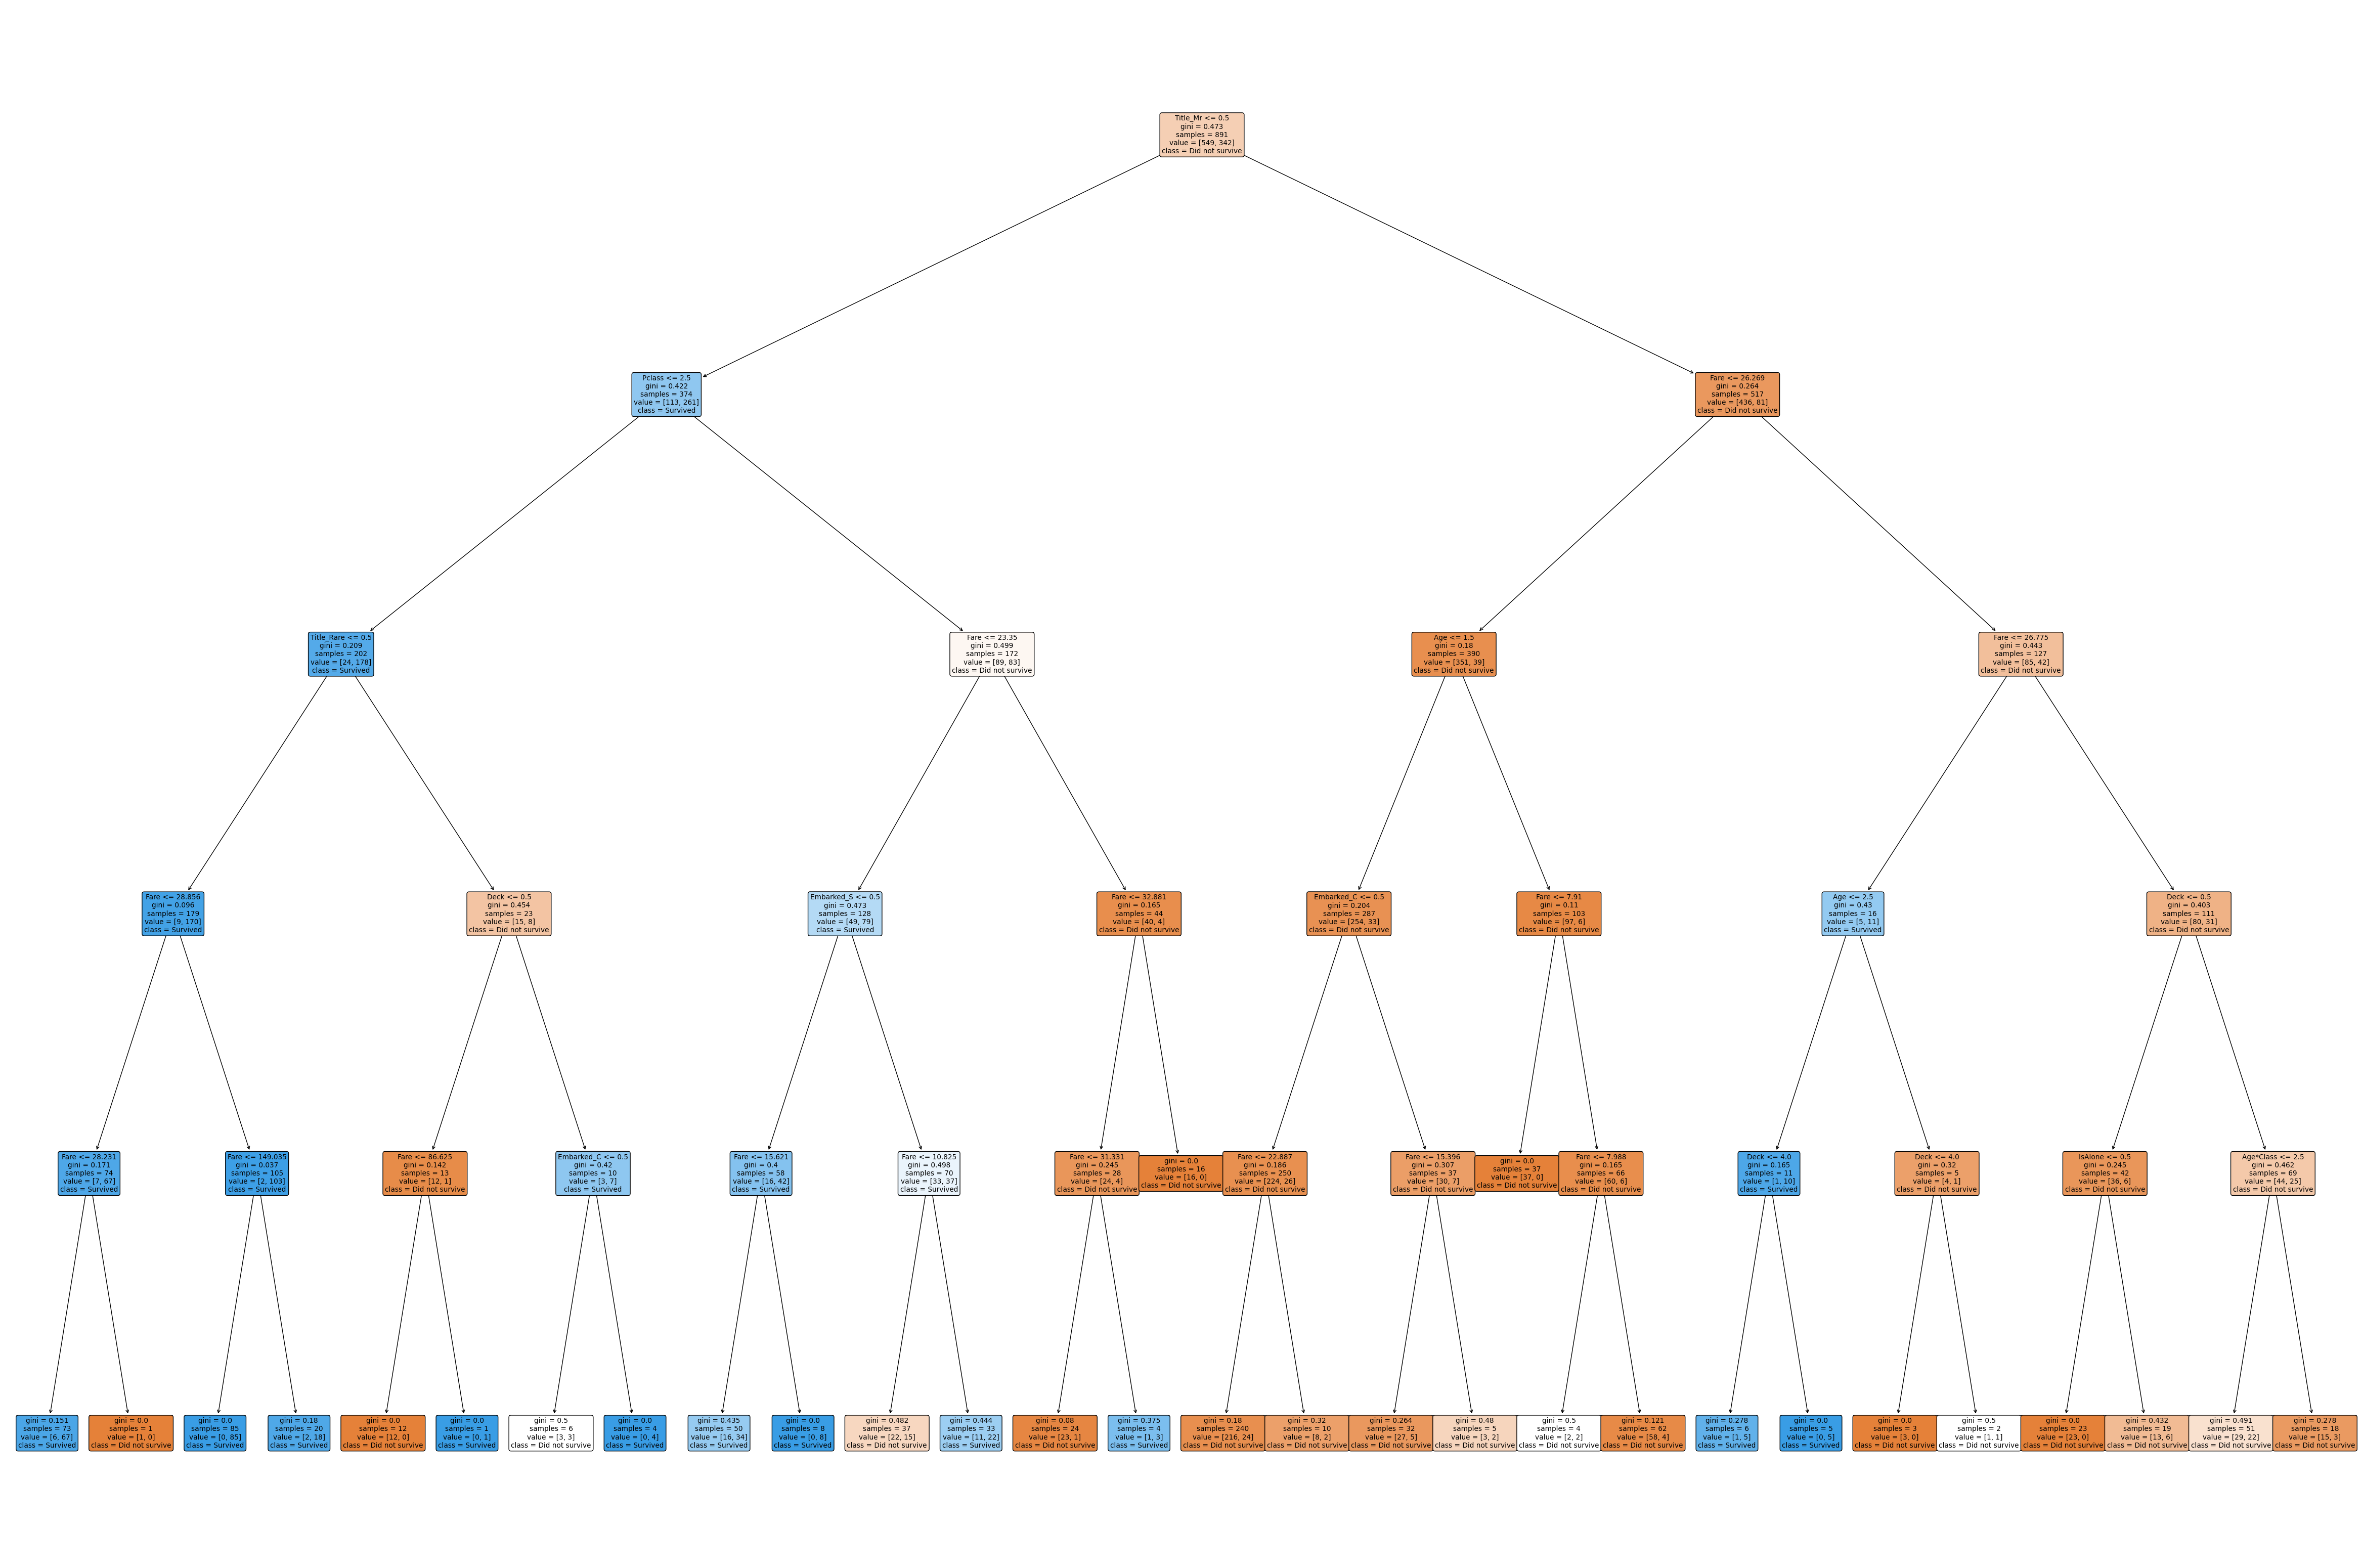

In [19]:
# Create a decision tree model
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, Y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
plot_tree(decision_tree, feature_names=X_train.columns.tolist(), class_names=["Did not survive", "Survived"], filled=True, rounded=True)
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation and calculate accuracy
scores = cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = scores.mean()

# Print the accuracy for each fold and the average accuracy
for i, score in enumerate(scores, start=1):
    print(f'Fold {i} Accuracy: {score:.4f}')

print(f'Average Accuracy: {average_accuracy:.4f}')

Fold 1 Accuracy: 0.7654
Fold 2 Accuracy: 0.8034
Fold 3 Accuracy: 0.8315
Fold 4 Accuracy: 0.7921
Fold 5 Accuracy: 0.8539
Average Accuracy: 0.8093


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define your fine-tuned random forest model (already trained)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)

# Perform 5-fold cross-validation and calculate accuracy
scores = cross_val_score(random_forest, X_train, Y_train, cv=5, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = scores.mean()

# Print the accuracy for each fold and the average accuracy
for i, score in enumerate(scores, start=1):
    print(f'Fold {i} Accuracy: {score:.4f}')

print(f'Average Accuracy: {average_accuracy:.4f}')

Fold 1 Accuracy: 0.8212
Fold 2 Accuracy: 0.8090
Fold 3 Accuracy: 0.8539
Fold 4 Accuracy: 0.8034
Fold 5 Accuracy: 0.8596
Average Accuracy: 0.8294
